In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.externals import joblib 

In [22]:
dataset= ("./Resources/WIne data red and white.csv")
data = pd.read_csv(dataset)

In [23]:

data.head()

,Type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [24]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)

In [25]:
data.keys()

Index(['Type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [26]:
print(data.columns.tolist())

['Type', 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


In [40]:
columns = data.columns.tolist()
columns.pop(len(columns)-1)
columns

['Type',
 'fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [43]:
# Fit the model to the data
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [45]:
predicted_clusters = kmeans.predict(data)
print(predicted_clusters)

[0 0 3 ... 1 1 1]


In [56]:
data['cluster_data'] = predicted_clusters.tolist()

data.head()

,Type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,cluster_data
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,3
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,2
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,2


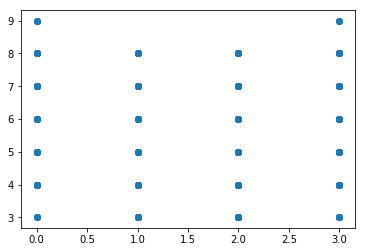

In [60]:
plt.scatter(data['cluster_data'], data['quality'])
plt.show()

In [61]:
columns = data.columns.tolist()
columns.pop(len(columns)-1)
columns

['Type',
 'fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

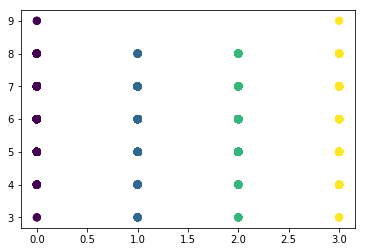

In [63]:
plt.scatter(data['cluster_data'], data['quality'], c=predicted_clusters, s=50, cmap='viridis')
plt.show()

In [64]:
centers = kmeans.cluster_centers_
labels = kmeans.labels_

In [65]:
centers

array([[9.72265023e-01, 6.89632768e+00, 2.82087827e-01, 3.38079096e-01,
        6.77696456e+00, 4.84262969e-02, 3.73186954e+01, 1.45198767e+02,
        9.94469109e-01, 3.19463277e+00, 4.92593734e-01, 1.03783753e+01,
        5.90703647e+00],
       [1.01805054e-01, 8.25400722e+00, 4.97545126e-01, 2.71415162e-01,
        2.46469314e+00, 8.17090253e-02, 1.27288809e+01, 3.41032491e+01,
        9.96195617e-01, 3.29875812e+00, 6.36902527e-01, 1.05705776e+01,
        5.67148014e+00],
       [9.98166819e-01, 6.97341888e+00, 2.94087993e-01, 3.54720440e-01,
        9.32433547e+00, 5.18515124e-02, 5.09133822e+01, 1.97958295e+02,
        9.96285990e-01, 3.18142988e+00, 5.15197067e-01, 9.71122823e+00,
        5.56553621e+00],
       [8.55834137e-01, 6.94836066e+00, 3.12263742e-01, 3.12926712e-01,
        4.13862102e+00, 4.82299904e-02, 2.53073770e+01, 9.93659595e+01,
        9.93073158e-01, 3.20681292e+00, 5.05486982e-01, 1.09562842e+01,
        5.96624879e+00]])

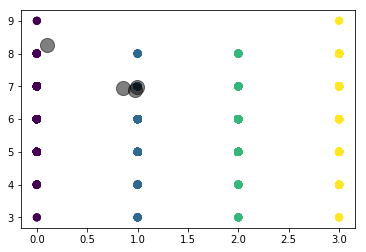

In [67]:
plt.scatter(data['cluster_data'], data['quality'], c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

plt.show()